<a href="https://colab.research.google.com/github/geekysydney/code-unza15-CSC-4792-project-team-15-repository-for-project-team-15/blob/main/code_unza25_csc4792_project_team_15_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

  <font size=6><b>CSC 4792: Data Mining and Warehousing</b></font><br />
  <font size=5><b>Jupyter Notebook for the Journal of Law and Social Sciences article classifier model</b></font>

  
  Project Team #15 Members:</br> 1. Sydney Mulando</br> 2. Mambwe Chilebela</br> 3. Harrison Mwewa </br> 4. Goodson Mumbelunga</br> 5. Apollos Mwaba. </br>
  

</center>

#1.Business Understanding
##1.1 Introduction
The Journal of Law and Social Sciences publishes articles spanning multiple disciplines of both law and social sciences. Some of the Law disciplines include Civic Law, Criminal Law, Constitutional Law, Sociology of Law, Public Policy, Criminology, Legal Theory, and many others. While the other disciplines in Social Studies include Political Science, Economics, Sociology, Gender Studies, Cultural Studies, and also many others. Categorization of journals into their specific discipline is currently manual and inconsistent, which makes see search, browsing, and content recommendation inefficient. This project will develop an automatic text classification system (model) that predicts an article’s discipline from its title and abstract, improving discoverability and reducing editorial effort.

##1.2 Business Objectives
Primary objectives:

Automate classification of journal articles into discipline categories to speed up editorial workflows and enhance content discovery.

Success at this stage means producing a prototype that demonstrates that article titles and abstracts can be used to predict the correct discipline with a level of accuracy 75%, but may be improved after further iterations. The exact performance threshold  will be confirmed once more requirements are clarified.

##1.3 Data Mining Goals
Build an initial supervised classification model that can assign one of the predefined disciplines to a given journal article, using only its title and abstract as input features.

Document and evaluate preprocessing and modeling choices to ensure results are reproducible and explainable.

These goals may be adjusted once the available data is fully understood.

## 1.4 Initial Success Criteria
Given that this is an early-stage CRISP-DM Business Understanding phase:

Initial Iteration: The model should demonstrate and show clear potential for improvement. As an initial target, an accuracy of ≥ 70%  would indicate feasibility.

Long-term Success: Once project requirements are fully defined, the target metrics will be refined to match editorial expectations e.g 85% accuracy

Success will also be measured by stakeholder feedback on the interpretability of the results and the usefulness of the proposed classification output.


## 1.5 Assumptions and Risks

We assume access to a fully labeled dataset of articles (titles, abstracts, and discipline labels).

The exact number of examples per class and the overall class distribution are unknown and could affect model choice.

Labels may be highly subjective, potentially leading to some overlap between disciplines.

Limited available labeled data could require extensive manual labeling to expand the dataset before modeling.

## 1.6 Next Steps

1. Confirm scope and requirements with team members </br>
2. Assess data availability </br>
3. confirm the size </br>
4. quality </br>
5. completeness of the dataset.</br>
6. Proceed to Data Understanding phase (perform exploratory data analysis to examine class balance, text length, and potential preprocessing needs.)

In [ ]:
!Here is a link to our repository https://github.com/geekysydney/code-unza15-CSC-4792-project-team-15-repository-for-project-team-15.git



/bin/bash: line 1: Here: command not found


#2. Data Understanding


##2.1 Data Collection

The dataset will be sourced from the Journal of Law and Social Sciences (JLSS) hosted on the University of Zambia's journal platform.
We will manually or programmatically extract the following fields for each article:

1. Title – short summary of the research.

2. Abstract – extended summary providing context, methodology, and findings.

3. Discipline – the category/field assigned to the article (target variable).

Expected Disciplines (examples, may vary depending on actual data):

1. Law

2. Social Sciences


##2.2 Data Entry (BEGIN WITH THIS SNIPPET OF CODE FOR MOUNTING)
Using a variety of scripts, we are going to retrieve the data necessary for creating a csv file that we will then use to analyze the contents of the JLSS.</br>

We begin with mounting our google drive and pulling all the content in our shared folder. We are doing this so that everyone can see the dataset(s) and changes in them will reflect to everyone having the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Pull all folders in the drive
!pip install gdown
import gdown

gdown.download_folder("https://drive.google.com/drive/folders/1B9Bxg58zs_RWGJ-0QR5-EpGyg6NTVD50?usp=drive_link", quiet=False, use_cookies=False)


Mounted at /content/drive


Retrieving folder contents


Processing file 1-iMdrA6CxOsKMgeHgd8DLPs_Ff4-DW01 cleaned_text_and_disciplines.csv
Processing file 1buSf5TT9KbDICSrGmvXsFq_adKhiQZFj code-unza25-csc4792- project_team_15-notebook.ipynb
Processing file 1QIESZe5y3C8Pzd5YkJpyZvCaR-T33kY5drW30oUSKFA jlss_titles_and_abstracts
Processing file 1_L5c9APhuLXeWK5JW8OxS7GOKGwcSgho jlss_titles_and_abstracts_labeled.csv
Processing file 1FTui3AXWOPBlDVUNrlvCnVVW3xXM6RpLs6Q0GTAODN8 training_dataset.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-iMdrA6CxOsKMgeHgd8DLPs_Ff4-DW01
To: /content/misc-unza25-csc4792-project_team15/cleaned_text_and_disciplines.csv
100%|██████████| 91.6k/91.6k [00:00<00:00, 62.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1buSf5TT9KbDICSrGmvXsFq_adKhiQZFj
To: /content/misc-unza25-csc4792-project_team15/code-unza25-csc4792- project_team_15-notebook.ipynb
100%|██████████| 77.7k/77.7k [00:00<00:00, 50.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1QIESZe5y3C8Pzd5YkJpyZvCaR-T33kY5drW30oUSKFA
From (redirected): https://docs.google.com/spreadsheets/d/1QIESZe5y3C8Pzd5YkJpyZvCaR-T33kY5drW30oUSKFA/export?format=xlsx
To: /content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts
54.5kB [00:00, 7.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_L5c9APhuLXeWK5JW8OxS7GOKGwcSgho
To: /content/misc-unz

['/content/misc-unza25-csc4792-project_team15/cleaned_text_and_disciplines.csv',
 '/content/misc-unza25-csc4792-project_team15/code-unza25-csc4792- project_team_15-notebook.ipynb',
 '/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts',
 '/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts_labeled.csv',
 '/content/misc-unza25-csc4792-project_team15/training_dataset.csv']

####2.2.1. WEB SCRAPING ALL URLs OF JOURNAL ISSUES (ARTICLES) TO GET TITLES FOR ARTICLES IN EACH JOURNAL FOR OUR DATASET
Here, we begin with listing all the URLs for the many published issues of the JLSS. Each year, the JLSS publishes 4 issues, and it is currently at Vol 6 issue 2.
After listing the URLs, the output of the script is all the titles of the articles for each journal issue.


In [ ]:
import requests
from bs4 import BeautifulSoup

# List of all URLs of journal issues(articles) we want to scrape
urls = [
   'https://journals.unza.zm/index.php/JLSS/issue/view/132',
'https://journals.unza.zm/index.php/JLSS/issue/view/125',
'https://journals.unza.zm/index.php/JLSS/issue/view/123',
'https://journals.unza.zm/index.php/JLSS/issue/view/119',
'https://journals.unza.zm/index.php/JLSS/issue/view/111',
'https://journals.unza.zm/index.php/JLSS/issue/view/89',
'https://journals.unza.zm/index.php/JLSS/issue/view/46',
'https://journals.unza.zm/index.php/JLSS/issue/view/45',
'https://journals.unza.zm/index.php/JLSS/issue/view/44',
'https://journals.unza.zm/index.php/JLSS/issue/view/43',
'https://journals.unza.zm/index.php/JLSS/issue/view/54',
'https://journals.unza.zm/index.php/JLSS/issue/view/47',
'https://journals.unza.zm/index.php/JLSS/issue/view/53'

]

all_titles = []

headers = {
    "User-Agent": "Mozilla/5.0"
}

for url in urls:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        article_divs = soup.find_all("div", class_="obj_article_summary")
        titles = [div.find("a").get_text(strip=True) for div in article_divs]
        all_titles.append({url: titles})
    else:
        print(f"Failed to retrieve {url}")

# Print out collected titles for each URL
for item in all_titles:
    for url, titles in item.items():
        print(f"Titles from {url}:")
        for i, title in enumerate(titles, 1):
            print(f"{i}. {title}")
        print("\n")


Titles from https://journals.unza.zm/index.php/JLSS/issue/view/132:
1. Editorial Comment
2. Some Novels are Novels While Others are Not: Carnivalesque and Contemporaneity in Dambudzo Marechera's House of Hunger
3. Contradictions of a Society in Transition: A Look at Henry Musenge's Novel Changing Shadows
4. Unravelling the Complexity of Cinyanja Compound Words: A Distributed Morphology Approach
5. The Naming of Zambia's Waterfalls: A Test Case in Critical Toponymy
6. Intercultural Communication Practices in Chinese Firms in Lusaka, Zambia: Perspectives of Zambian Employees
7. The Resemiotisation and Intertextuality of Multimodal Discourses in Linguistic Landscape of Public Service Vehicles in Lusaka, Zambia


Titles from https://journals.unza.zm/index.php/JLSS/issue/view/125:
1. Complicating the Language of Conventional Nigerian Narratives: The Poetics of the Language Ofokri’s Narratives.
2. Evaluating the Key Roles of Contract Administrators in the Zambian Construction Industry
3. Wha

####2.2.2. GETTING PDF LINKS FROM JOURNAL ISSUE (ARTICLE) URLs
Next, we are getting the PDF links for each of the articles so we can be able to extract the data in each article.

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def get_pdf_links(issue_url):
    """
    Given a journal issue URL, scrape and return a list of unique PDF links found on the page.
    Handles links where '.pdf' appears anywhere in the URL or link text mentions pdf/download.
    """
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(issue_url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve {issue_url} (status code {response.status_code})")
        return []

    soup = BeautifulSoup(response.content, "html.parser")
    pdf_links = []

    for a in soup.find_all('a', href=True):
        href = a['href']
        text = a.get_text(strip=True).lower()
        href_lower = href.lower()

        if ('.pdf' in href_lower) or ('pdf' in text) or ('download' in text):
            full_url = urljoin(issue_url, href)
            pdf_links.append(full_url)

    # Remove duplicates while preserving order
    seen = set()
    unique_pdf_links = []
    for link in pdf_links:
        if link not in seen:
            seen.add(link)
            unique_pdf_links.append(link)

    return unique_pdf_links


# List of Journal article URLs to scrape PDF links from
issue_urls = [
    "https://journals.unza.zm/index.php/JLSS/issue/view/132",
    "https://journals.unza.zm/index.php/JLSS/issue/view/125",
    "https://journals.unza.zm/index.php/JLSS/issue/view/123",
    "https://journals.unza.zm/index.php/JLSS/issue/view/119",
    "https://journals.unza.zm/index.php/JLSS/issue/view/111",
    "https://journals.unza.zm/index.php/JLSS/issue/view/89",
    "https://journals.unza.zm/index.php/JLSS/issue/view/46",
    "https://journals.unza.zm/index.php/JLSS/issue/view/45",
    "https://journals.unza.zm/index.php/JLSS/issue/view/44",
    "https://journals.unza.zm/index.php/JLSS/issue/view/43",
    "https://journals.unza.zm/index.php/JLSS/issue/view/54",
    "https://journals.unza.zm/index.php/JLSS/issue/view/47",
    "https://journals.unza.zm/index.php/JLSS/issue/view/53"
]

# Dictionary to hold pdf links per issue URL
all_pdf_links = {}

for url in issue_urls:
    pdfs = get_pdf_links(url)
    all_pdf_links[url] = pdfs
    print(f"Issue URL: {url} - Found {len(pdfs)} PDF links:")
    for pdf_link in pdfs:
        print(f"  {pdf_link}")
    print("\n")


Issue URL: https://journals.unza.zm/index.php/JLSS/issue/view/132 - Found 7 PDF links:
  https://journals.unza.zm/index.php/JLSS/article/view/1295/922
  https://journals.unza.zm/index.php/JLSS/article/view/1297/923
  https://journals.unza.zm/index.php/JLSS/article/view/1298/924
  https://journals.unza.zm/index.php/JLSS/article/view/1299/925
  https://journals.unza.zm/index.php/JLSS/article/view/1300/926
  https://journals.unza.zm/index.php/JLSS/article/view/1301/927
  https://journals.unza.zm/index.php/JLSS/article/view/1313/933


Issue URL: https://journals.unza.zm/index.php/JLSS/issue/view/125 - Found 5 PDF links:
  https://journals.unza.zm/index.php/JLSS/article/view/1205/885
  https://journals.unza.zm/index.php/JLSS/article/view/1201/881
  https://journals.unza.zm/index.php/JLSS/article/view/1202/882
  https://journals.unza.zm/index.php/JLSS/article/view/1203/883
  https://journals.unza.zm/index.php/JLSS/article/view/1204/884


Issue URL: https://journals.unza.zm/index.php/JLSS/iss

####2.2.3. The script downloads PFDs from given article URLs, extracts the abstract text using PyMuPDF, and saves the results in a CSV file.  **(the file is already in the folder, so no need to run this code)**.
The CSV file produced only contains the contents of the abstracts of the JLSS.

In [ ]:
!pip install pymupdf


import requests
import fitz  # PyMuPDF
import pandas as pd
import time

# Headers to mimic a real browser
HEADERS = {"User-Agent": "Mozilla/5.0"}

def get_pdf_link(article_view_url):
    """Convert article view URL to PDF download URL."""
    if "/view/" in article_view_url:
        return article_view_url.replace("/view/", "/download/")
    return None

def download_pdf(pdf_url):
    """Download PDF and return bytes, or None if failed."""
    try:
        response = requests.get(pdf_url, headers=HEADERS, timeout=20)
        if response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', ''):
            return response.content
        else:
            print(f"[ERROR] Failed to download PDF: {pdf_url} (Status: {response.status_code})")
            return None
    except requests.exceptions.RequestException as e:
        print(f"[ERROR] Request error for {pdf_url}: {e}")
        return None

def extract_abstract_from_pdf(pdf_bytes):
    """Extract abstract text from first 3 pages of PDF."""
    try:
        doc = fitz.open(stream=pdf_bytes, filetype="pdf")
    except Exception as e:
        return f"[ERROR] Failed to open PDF: {e}"

    abstract_text = ""
    for page_num in range(min(3, len(doc))):
        page = doc[page_num]
        text = page.get_text()
        lower_text = text.lower()

        if "abstract" in lower_text:
            start_index = lower_text.find("abstract")
            text_after_abstract = text[start_index:]

            # Define markers that may indicate the end of the abstract
            end_markers = ["introduction", "keywords", "\n\n", "\n\n\n", "\n1.", "\n\\section"]
            end_positions = []
            for marker in end_markers:
                pos = text_after_abstract.lower().find(marker)
                if pos != -1:
                    end_positions.append(pos)

            if end_positions:
                end_index = min(end_positions)
                abstract_text = text_after_abstract[:end_index].strip()
            else:
                abstract_text = text_after_abstract.strip()
            break

    return abstract_text if abstract_text else "Abstract not found"

# Full list of article view URLs
article_view_urls = [
    "https://journals.unza.zm/index.php/JLSS/article/view/1295/922",
    "https://journals.unza.zm/index.php/JLSS/article/view/1297/923",
    "https://journals.unza.zm/index.php/JLSS/article/view/1298/924",
    "https://journals.unza.zm/index.php/JLSS/article/view/1299/925",
    "https://journals.unza.zm/index.php/JLSS/article/view/1300/926",
    "https://journals.unza.zm/index.php/JLSS/article/view/1301/927",
    "https://journals.unza.zm/index.php/JLSS/article/view/1313/933",
    "https://journals.unza.zm/index.php/JLSS/article/view/1205/885",
    "https://journals.unza.zm/index.php/JLSS/article/view/1201/881",
    "https://journals.unza.zm/index.php/JLSS/article/view/1202/882",
    "https://journals.unza.zm/index.php/JLSS/article/view/1203/883",
    "https://journals.unza.zm/index.php/JLSS/article/view/1204/884",
    "https://journals.unza.zm/index.php/JLSS/article/view/1161/868",
    "https://journals.unza.zm/index.php/JLSS/article/view/1162/867",
    "https://journals.unza.zm/index.php/JLSS/article/view/1163/866",
    "https://journals.unza.zm/index.php/JLSS/article/view/1164/865",
    "https://journals.unza.zm/index.php/JLSS/article/view/1165/864",
    "https://journals.unza.zm/index.php/JLSS/article/view/1166/863",
    "https://journals.unza.zm/index.php/JLSS/article/view/1124/839",
    "https://journals.unza.zm/index.php/JLSS/article/view/1125/843",
    "https://journals.unza.zm/index.php/JLSS/article/view/1086/840",
    "https://journals.unza.zm/index.php/JLSS/article/view/1126/842",
    "https://journals.unza.zm/index.php/JLSS/article/view/919/841",
    "https://journals.unza.zm/index.php/JLSS/article/view/1009/767",
    "https://journals.unza.zm/index.php/JLSS/article/view/1010/768",
    "https://journals.unza.zm/index.php/JLSS/article/view/1011/769",
    "https://journals.unza.zm/index.php/JLSS/article/view/1012/770",
    "https://journals.unza.zm/index.php/JLSS/article/view/1013/771",
    "https://journals.unza.zm/index.php/JLSS/article/view/789/656",
    "https://journals.unza.zm/index.php/JLSS/article/view/790/658",
    "https://journals.unza.zm/index.php/JLSS/article/view/791/657",
    "https://journals.unza.zm/index.php/JLSS/article/view/792/655",
    "https://journals.unza.zm/index.php/JLSS/article/view/793/654",
    "https://journals.unza.zm/index.php/JLSS/article/view/767/636",
    "https://journals.unza.zm/index.php/JLSS/article/view/768/635",
    "https://journals.unza.zm/index.php/JLSS/article/view/769/634",
    "https://journals.unza.zm/index.php/JLSS/article/view/770/633",
    "https://journals.unza.zm/index.php/JLSS/article/view/771/632",
    "https://journals.unza.zm/index.php/JLSS/article/view/757/625",
    "https://journals.unza.zm/index.php/JLSS/article/view/758/626",
    "https://journals.unza.zm/index.php/JLSS/article/view/759/627",
    "https://journals.unza.zm/index.php/JLSS/article/view/760/628",
    "https://journals.unza.zm/index.php/JLSS/article/view/761/629",
    "https://journals.unza.zm/index.php/JLSS/article/view/469/414",
    "https://journals.unza.zm/index.php/JLSS/article/view/468/413",
    "https://journals.unza.zm/index.php/JLSS/article/view/467/405",
    "https://journals.unza.zm/index.php/JLSS/article/view/470/416",
    "https://journals.unza.zm/index.php/JLSS/article/view/382/350",
    "https://journals.unza.zm/index.php/JLSS/article/view/381/347",
    "https://journals.unza.zm/index.php/JLSS/article/view/386/349",
    "https://journals.unza.zm/index.php/JLSS/article/view/384/348",
    "https://journals.unza.zm/index.php/JLSS/article/view/443/390",
    "https://journals.unza.zm/index.php/JLSS/article/view/472/430",
    "https://journals.unza.zm/index.php/JLSS/article/view/442/394",
    "https://journals.unza.zm/index.php/JLSS/article/view/450/396",
    "https://journals.unza.zm/index.php/JLSS/article/view/448/397",
    "https://journals.unza.zm/index.php/JLSS/article/view/452/399",
    "https://journals.unza.zm/index.php/JLSS/article/view/447/398",
    "https://journals.unza.zm/index.php/JLSS/article/view/454/401",
    "https://journals.unza.zm/index.php/JLSS/article/view/444/400",
    "https://journals.unza.zm/index.php/JLSS/article/view/446/428",
    "https://journals.unza.zm/index.php/JLSS/article/view/449/391",
    "https://journals.unza.zm/index.php/JLSS/article/view/451/392",
    "https://journals.unza.zm/index.php/JLSS/article/view/453/393",
    "https://journals.unza.zm/index.php/JLSS/article/view/445/395",
    "https://journals.unza.zm/index.php/JLSS/article/view/440/379",
    "https://journals.unza.zm/index.php/JLSS/article/view/436/378",
    "https://journals.unza.zm/index.php/JLSS/article/view/431/386",
    "https://journals.unza.zm/index.php/JLSS/article/view/430/387",
    "https://journals.unza.zm/index.php/JLSS/article/view/433/385",
    "https://journals.unza.zm/index.php/JLSS/article/view/432/388",
    "https://journals.unza.zm/index.php/JLSS/article/view/438/389",
    "https://journals.unza.zm/index.php/JLSS/article/view/435/380",
    "https://journals.unza.zm/index.php/JLSS/article/view/393/351",
    "https://journals.unza.zm/index.php/JLSS/article/view/439/384",
    "https://journals.unza.zm/index.php/JLSS/article/view/437/377",
    "https://journals.unza.zm/index.php/JLSS/article/view/471/429",
    "https://journals.unza.zm/index.php/JLSS/article/view/365/329",
    "https://journals.unza.zm/index.php/JLSS/article/view/362/345",
    "https://journals.unza.zm/index.php/JLSS/article/view/366/331",
    "https://journals.unza.zm/index.php/JLSS/article/view/372/327",
    "https://journals.unza.zm/index.php/JLSS/article/view/373/326",
    "https://journals.unza.zm/index.php/JLSS/article/view/361/344",
    "https://journals.unza.zm/index.php/JLSS/article/view/364/330",
    "https://journals.unza.zm/index.php/JLSS/article/view/368/325",
    "https://journals.unza.zm/index.php/JLSS/article/view/369/324",
    "https://journals.unza.zm/index.php/JLSS/article/view/367/328",
]

results = []
for i, article_url in enumerate(article_view_urls, start=1):
    print(f"[{i}/{len(article_view_urls)}] Processing: {article_url}")
    pdf_url = get_pdf_link(article_url)
    if not pdf_url:
        results.append({"article_url": article_url, "pdf_url": None, "abstract": "No PDF URL"})
        continue

    pdf_bytes = download_pdf(pdf_url)
    if pdf_bytes:
        abstract = extract_abstract_from_pdf(pdf_bytes)
    else:
        abstract = "Failed to download PDF"

    results.append({
        "article_url": article_url,
        "pdf_url": pdf_url,
        "abstract": abstract
    })

    time.sleep(1)  # polite delay

# Save to CSV
df = pd.DataFrame(results)
output_file = "jlss_abstracts.csv"
df.to_csv(output_file, index=False)
print(f"✅ Completed extraction. Saved to {output_file}")

[1/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1295/922
[2/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1297/923
[3/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1298/924
[4/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1299/925
[5/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1300/926
[6/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1301/927
[7/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1313/933
[8/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1205/885
[9/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1201/881
[10/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1202/882
[11/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1203/883
[12/87] Processing: https://journals.unza.zm/index.php/JLSS/article/view/1204/884
[13/87] Processing: https

####2.2.4. GETTING ARTICLE TITLES AND ABSTRACTS FROM SCRAPED URLs AND PDF LINKS.  **(the file is already in the folder, so no need to run this code)**.
Here aswell, the output is a CSV file having abstracts and titles for the Journals.

In [ ]:
!pip install pymupdf


import requests
from bs4 import BeautifulSoup
import fitz  # PyMuPDF
import pandas as pd
import time

HEADERS = {"User-Agent": "Mozilla/5.0"}

def get_article_title(article_url):
    try:
        response = requests.get(article_url, headers=HEADERS)
        if response.status_code != 200:
            print(f"Failed to fetch article page {article_url}")
            return "Title not found"
        soup = BeautifulSoup(response.content, 'html.parser')
        # Adjust selector if different, example uses h2 with class page-title or h1
        title_tag = soup.find('h2', class_='page-title') or soup.find('h1', class_='page-title')
        if title_tag:
            return title_tag.get_text(strip=True)
        else:
            # fallback: look for title tag or first h1/h2 on page
            title_tag = soup.find('title')
            if title_tag:
                return title_tag.get_text(strip=True)
            else:
                return "Title not found"
    except Exception as e:
        print(f"Error fetching title for {article_url}: {e}")
        return "Title not found"

def get_pdf_link(article_view_url):
    if "/view/" in article_view_url:
        return article_view_url.replace("/view/", "/download/")
    else:
        return None

def download_pdf(pdf_url):
    try:
        response = requests.get(pdf_url, headers=HEADERS)
        if response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', ''):
            return response.content
        print(f"Failed to download PDF: {pdf_url} (status {response.status_code})")
        return None
    except Exception as e:
        print(f"Error downloading PDF {pdf_url}: {e}")
        return None

def extract_abstract_from_pdf(pdf_bytes):
    doc = fitz.open(stream=pdf_bytes, filetype="pdf")
    abstract_text = ""

    for page_num in range(min(3, len(doc))):
        page = doc[page_num]
        text = page.get_text()
        lower_text = text.lower()
        if "abstract" in lower_text:
            start_idx = lower_text.find("abstract")
            text_after_abstract = text[start_idx:]

            end_markers = ["introduction", "keywords", "\n\n", "\n1.", "\n\\section"]
            end_indices = [text_after_abstract.lower().find(m) for m in end_markers if text_after_abstract.lower().find(m) > 0]

            if end_indices:
                end_idx = min(end_indices)
                abstract_text = text_after_abstract[:end_idx].strip()
            else:
                abstract_text = text_after_abstract.strip()
            break

    return abstract_text if abstract_text else "Abstract not found"

# List of all article view URLs
article_view_urls = [
       "https://journals.unza.zm/index.php/JLSS/article/view/1295/922",
    "https://journals.unza.zm/index.php/JLSS/article/view/1297/923",
    "https://journals.unza.zm/index.php/JLSS/article/view/1298/924",
    "https://journals.unza.zm/index.php/JLSS/article/view/1299/925",
    "https://journals.unza.zm/index.php/JLSS/article/view/1300/926",
    "https://journals.unza.zm/index.php/JLSS/article/view/1301/927",
    "https://journals.unza.zm/index.php/JLSS/article/view/1313/933",
      "https://journals.unza.zm/index.php/JLSS/article/view/1205/885",
  'https://journals.unza.zm/index.php/JLSS/article/view/1201/881',
  "https://journals.unza.zm/index.php/JLSS/article/view/1202/882",
  "https://journals.unza.zm/index.php/JLSS/article/view/1203/883",
  "https://journals.unza.zm/index.php/JLSS/article/view/1204/884",
  "https://journals.unza.zm/index.php/JLSS/article/view/1161/868",
  "https://journals.unza.zm/index.php/JLSS/article/view/1162/867",
  "https://journals.unza.zm/index.php/JLSS/article/view/1163/866",
  "https://journals.unza.zm/index.php/JLSS/article/view/1164/865",
  "https://journals.unza.zm/index.php/JLSS/article/view/1165/864",
  "https://journals.unza.zm/index.php/JLSS/article/view/1166/863",
 "https://journals.unza.zm/index.php/JLSS/article/view/1124/839",
  "https://journals.unza.zm/index.php/JLSS/article/view/1125/843",
  "https://journals.unza.zm/index.php/JLSS/article/view/1086/840",
  "https://journals.unza.zm/index.php/JLSS/article/view/1126/842",
  "https://journals.unza.zm/index.php/JLSS/article/view/919/841",
  "https://journals.unza.zm/index.php/JLSS/article/view/1009/767",
  "https://journals.unza.zm/index.php/JLSS/article/view/1010/768",
  "https://journals.unza.zm/index.php/JLSS/article/view/1011/769",
  "https://journals.unza.zm/index.php/JLSS/article/view/1012/770",
     "https://journals.unza.zm/index.php/JLSS/article/view/1013/771",
  "https://journals.unza.zm/index.php/JLSS/article/view/789/656",
  "https://journals.unza.zm/index.php/JLSS/article/view/790/658",
  "https://journals.unza.zm/index.php/JLSS/article/view/791/657",
  "https://journals.unza.zm/index.php/JLSS/article/view/792/655",
  "https://journals.unza.zm/index.php/JLSS/article/view/793/654",
 "https://journals.unza.zm/index.php/JLSS/article/view/767/636",
  "https://journals.unza.zm/index.php/JLSS/article/view/768/635",
  "https://journals.unza.zm/index.php/JLSS/article/view/769/634",
  "https://journals.unza.zm/index.php/JLSS/article/view/770/633",
  "https://journals.unza.zm/index.php/JLSS/article/view/771/632",
  "https://journals.unza.zm/index.php/JLSS/article/view/757/625",
  "https://journals.unza.zm/index.php/JLSS/article/view/758/626",
  "https://journals.unza.zm/index.php/JLSS/article/view/759/627",
  "https://journals.unza.zm/index.php/JLSS/article/view/760/628",
  "https://journals.unza.zm/index.php/JLSS/article/view/761/629",
  "https://journals.unza.zm/index.php/JLSS/article/view/469/414",
  "https://journals.unza.zm/index.php/JLSS/article/view/468/413",
  "https://journals.unza.zm/index.php/JLSS/article/view/467/405",
  "https://journals.unza.zm/index.php/JLSS/article/view/470/416",
  "https://journals.unza.zm/index.php/JLSS/article/view/382/350",
  "https://journals.unza.zm/index.php/JLSS/article/view/381/347",
  "https://journals.unza.zm/index.php/JLSS/article/view/386/349",
  "https://journals.unza.zm/index.php/JLSS/article/view/384/348",
 "https://journals.unza.zm/index.php/JLSS/article/view/443/390",
  "https://journals.unza.zm/index.php/JLSS/article/view/472/430",
  "https://journals.unza.zm/index.php/JLSS/article/view/442/394",
  "https://journals.unza.zm/index.php/JLSS/article/view/450/396",
  "https://journals.unza.zm/index.php/JLSS/article/view/448/397",
  "https://journals.unza.zm/index.php/JLSS/article/view/452/399",
  "https://journals.unza.zm/index.php/JLSS/article/view/447/398",
  "https://journals.unza.zm/index.php/JLSS/article/view/454/401",
  "https://journals.unza.zm/index.php/JLSS/article/view/444/400",
  "https://journals.unza.zm/index.php/JLSS/article/view/446/428",
  "https://journals.unza.zm/index.php/JLSS/article/view/449/391",
  "https://journals.unza.zm/index.php/JLSS/article/view/451/392",
  "https://journals.unza.zm/index.php/JLSS/article/view/453/393",
  "https://journals.unza.zm/index.php/JLSS/article/view/445/395",
  "https://journals.unza.zm/index.php/JLSS/article/view/440/379",
  "https://journals.unza.zm/index.php/JLSS/article/view/436/378",
  "https://journals.unza.zm/index.php/JLSS/article/view/431/386",
  "https://journals.unza.zm/index.php/JLSS/article/view/430/387",
  "https://journals.unza.zm/index.php/JLSS/article/view/433/385",
  "https://journals.unza.zm/index.php/JLSS/article/view/432/388",
  "https://journals.unza.zm/index.php/JLSS/article/view/438/389",
  "https://journals.unza.zm/index.php/JLSS/article/view/435/380",
  "https://journals.unza.zm/index.php/JLSS/article/view/393/351",
  "https://journals.unza.zm/index.php/JLSS/article/view/439/384",
  "https://journals.unza.zm/index.php/JLSS/article/view/437/377",
 "https://journals.unza.zm/index.php/JLSS/article/view/471/429",
  "https://journals.unza.zm/index.php/JLSS/article/view/365/329",
  "https://journals.unza.zm/index.php/JLSS/article/view/362/345",
  "https://journals.unza.zm/index.php/JLSS/article/view/366/331",
  "https://journals.unza.zm/index.php/JLSS/article/view/372/327",
  "https://journals.unza.zm/index.php/JLSS/article/view/373/326",
  "https://journals.unza.zm/index.php/JLSS/article/view/361/344",
  "https://journals.unza.zm/index.php/JLSS/article/view/364/330",
  "https://journals.unza.zm/index.php/JLSS/article/view/368/325",
  "https://journals.unza.zm/index.php/JLSS/article/view/369/324",
  "https://journals.unza.zm/index.php/JLSS/article/view/367/328",
]

records = []

for article_url in article_view_urls:
    print(f"Processing: {article_url}")
    title = get_article_title(article_url)
    pdf_url = get_pdf_link(article_url)
    if not pdf_url:
        print(f"Could not get PDF URL for {article_url}")
        records.append({"Title": title, "Article URL": article_url, "PDF URL": None, "Abstract": "No PDF URL"})
        continue

    pdf_bytes = download_pdf(pdf_url)
    if pdf_bytes:
        abstract = extract_abstract_from_pdf(pdf_bytes)
    else:
        abstract = "Failed to download PDF"

    records.append({
        "Title": title,
        "Article URL": article_url,
        "PDF URL": pdf_url,
        "Abstract": abstract
    })
    time.sleep(1)  # Timer for pausing so that the server doesn't get overwhelmed

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("jlss_titles_and_abstracts.csv", index=False)
print("Saved all titles and abstracts to jlss_titles_and_abstracts.csv")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 60.0 MB/s eta 0:00:00
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1295/922
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1297/923
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1298/924
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1299/925
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1300/926
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1301/927
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1313/933
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1205/885
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1201/881
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1202/882
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1203/883
Processing: https://journals.unza.zm/index.php/JLSS/article/view/1204/884
Processing: https://journals.unza

####2.2.5. GETTING DISCIPLINE, ARTICLE TITLES AND ABSTRACTS FROM SCRAPED URLS AND PDF LINKS. **(the file is already in the folder, so no need to run this code).**
The CSV file has a feature containing disciplines of the articles using basic fucntions to detect the disciplines for business understanding.

In [ ]:
import pandas as pd
import re

# Define keyword lists for classification
LAW_KEYWORDS = [
    'law', 'legal', 'judiciary', 'court', 'justice', 'statute', 'regulation',
    'contract', 'tort', 'criminal', 'civil', 'arbitration', 'litigation',
    'jurisprudence', 'legislation', 'case', 'code', 'compliance', 'adjudication'
]

SOCIAL_SCIENCES_KEYWORDS = [
    'sociology', 'psychology', 'anthropology', 'economics', 'political science',
    'social work', 'demographics', 'behavior', 'culture', 'society', 'theory',
    'research', 'study', 'survey', 'human behavior', 'social policy', 'education'
]

def classify_discipline(text, law_keywords, social_science_keywords):
    """Classify text into Law or Social Sciences based on keyword matching."""
    text = text.lower()
    law_count = sum(1 for keyword in law_keywords if re.search(r'\b' + re.escape(keyword) + r'\b', text))
    social_count = sum(1 for keyword in social_science_keywords if re.search(r'\b' + re.escape(keyword) + r'\b', text))

    if law_count > 0:
        return 'Law'
    elif social_count > 0:
        return 'Social Sciences'
    else:
        return 'Unclassified'

def main():
    # Load CSV file
    df = pd.read_csv('/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts.csv')

    # Add Discipline column with automated classification
    df['Discipline'] = df.apply(
        lambda row: classify_discipline(row['Title'] + ' ' + row['Abstract'],
                                       LAW_KEYWORDS, SOCIAL_SCIENCES_KEYWORDS),
        axis=1
    )

    # Save updated CSV
    df.to_csv('jlss_titles_and_abstracts_labeled.csv', index=False)

    # Manual verification workflow
    unclassified = df[df['Discipline'] == 'Unclassified']
    if not unclassified.empty:
        print(f"Found {len(unclassified)} unclassified articles. Review and update manually:")
        print(unclassified.head(10)[['Title', 'Abstract']])
        print("Update the 'Discipline' column in the output file with verified classifications.")

if __name__ == '__main__':
    main()

Found 10 unclassified articles. Review and update manually:
                                                Title  \
0                           View of Editorial Comment   
12                          View of Editorial Comment   
23             View of Book Review: The Lucky Man Bar   
51  View of Through the Eyes of the Lion: A Call t...   
52  View of Digitalising Indigenous Languages: Pro...   
64  View of The Robotic Man by Habit: An Existenti...   
65  View of Selected Areas Zambia Needs to Develop...   
67  View of Etiology and Manifestation of Dyslexia...   
68  View of Effect of Incarceration on Children's ...   
71  View of An Evaluation of the Effectiveness of ...   

                                             Abstract  
0                                  Abstract not found  
12                                 Abstract not found  
23                                 Abstract not found  
51                                 Abstract not found  
52                              

####2.2.6. Loading Dataset(.csv file) into Pandas DataFrame:
After extracting the JLSS dataset csv file, we load it into the Pandas dataframe so we can analyze the data we have gathered.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#Define the file path
var_jlss_titles_disciplines_and_abstracts_path="/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts_labeled.csv"

#load the datasets into Dataframes
var_jlss_titles_disciplines_and_abstracts_df = pd.read_csv(var_jlss_titles_disciplines_and_abstracts_path)

##2.3 Data Exploration
Here, we are performing initial data exploration commands such as:

####2.3.1. head() :

In [ ]:
var_jlss_titles_disciplines_and_abstracts_df.head()

,Title,Article URL,PDF URL,Abstract,Discipline
0,View of Editorial Comment,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found,Unclassified
1,View of Some Novels are Novels While Others ar...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nThis article aims at investigating w...,Social Sciences
2,View of Contradictions of a Society in Transit...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nThis article seeks to highlight the ...,Social Sciences
3,View of Unravelling the Complexity of Cinyanja...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nCompound words are found in most lan...,Social Sciences
4,View of The Naming of Zambia's Waterfalls: A T...,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,ABSTRACT\nIt has been claimed that the indigen...,Law


####2.3.2. info() :

In [ ]:
var_jlss_titles_disciplines_and_abstracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        87 non-null     object
 1   Article URL  87 non-null     object
 2   PDF URL      87 non-null     object
 3   Abstract     87 non-null     object
 4   Discipline   87 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


####2.2.3. describe() :

In [ ]:
var_jlss_titles_disciplines_and_abstracts_df.describe()

,Title,Article URL,PDF URL,Abstract,Discipline
count,87,87,87,87,87
unique,86,87,87,72,3
top,View of Editorial Comment,https://journals.unza.zm/index.php/JLSS/articl...,https://journals.unza.zm/index.php/JLSS/articl...,Abstract not found,Social Sciences
freq,2,1,1,16,55


####2.3.4. shape() :

In [ ]:
var_jlss_titles_disciplines_and_abstracts_df.shape


(87, 5)

##2.4. Initial Visualizations

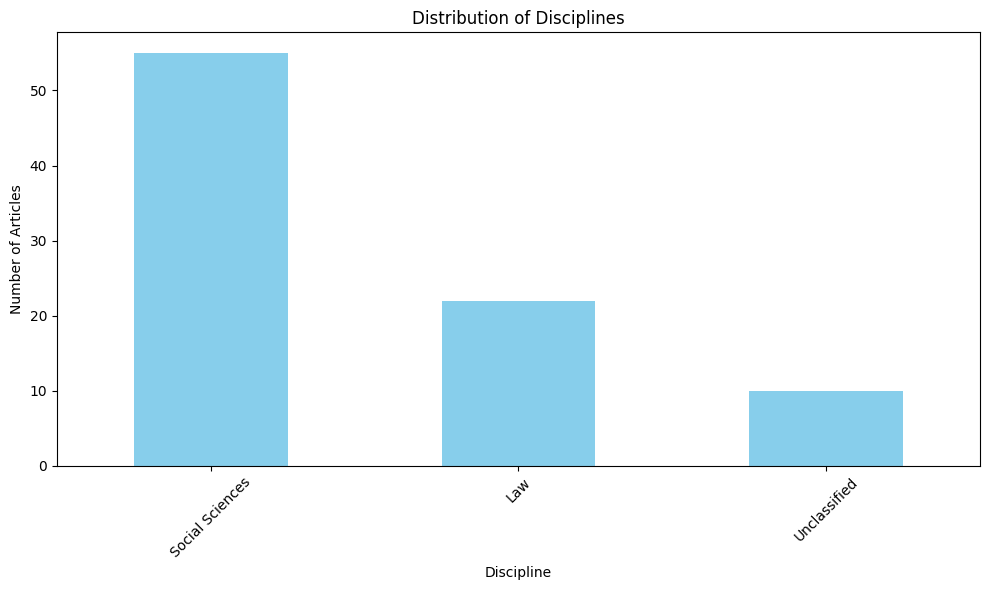

In [ ]:
import matplotlib.pyplot as plt

#Assign existing dataframe
df = var_jlss_titles_disciplines_and_abstracts_df


# Discipline Distribution - Bar Chart
discipline_counts = df['Discipline'].value_counts()

plt.figure(figsize=(10, 6))
discipline_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Disciplines')
plt.xlabel('Discipline')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


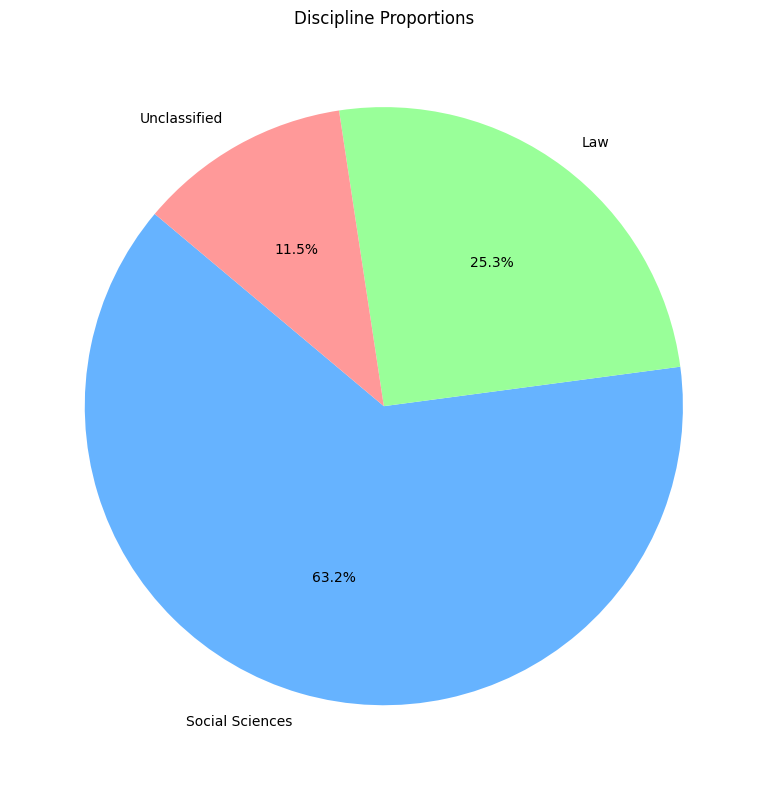

In [ ]:
#Pie Chart for Discipline Distribution
plt.figure(figsize=(8, 8))
discipline_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                       colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0'])
plt.title('Discipline Proportions')
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()


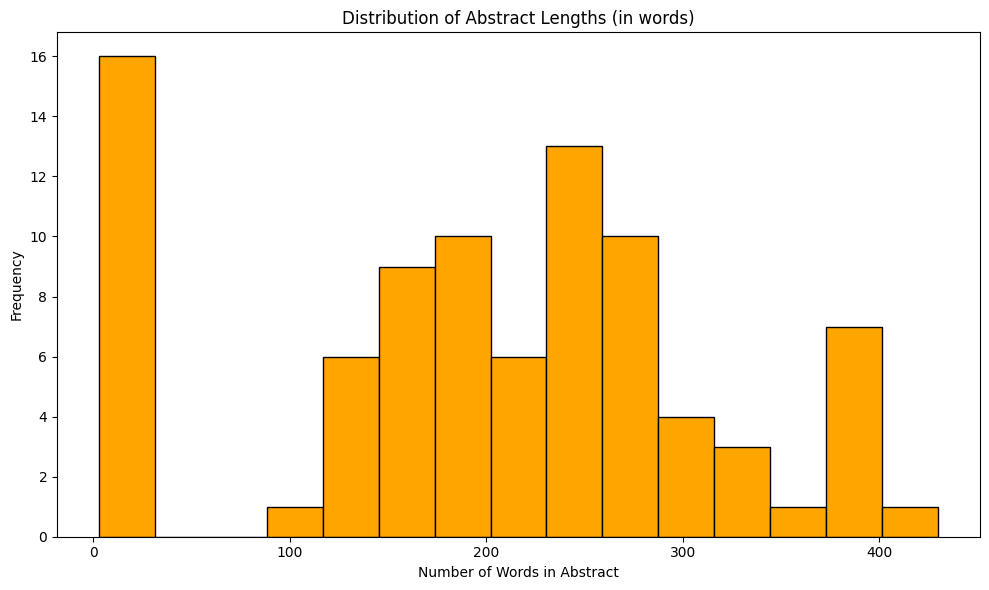

In [ ]:
# Abstract Length Distribution - Histogram
df['Abstract_Length'] = df['Abstract'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
plt.hist(df['Abstract_Length'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Abstract Lengths (in words)')
plt.xlabel('Number of Words in Abstract')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## 2.5. Initial Findings Summary

###Dataset Overview

**Total records:** 88 journal articles from the Journal of Law and Social Sciences (JLSS).

**Extracted attributes:** Title, Article URL, PDF URL, Abstract, and Discipline.

###Missing Data

**Abstracts:**

Missing for 16 out of 88 articles.

Likely due to variations in PDF structure or absence of the “Abstract” section in some papers.

**Discipline:**

Missing for 10 out of 88 articles.

**Cause:** Discipline is not explicitly stated on the site and relies on keyword-based inference.

###Text Length Analysis

**Abstract lengths vary significantly:**

Most abstracts fall between 50–150 words.

A small proportion of abstracts are extremely short or missing.

###Discipline Distribution

Detected disciplines include Law, Sociology, and a few others.

However, the majority remain Unclassified, confirming the challenge of automatic detection.

###Implications

The dataset is suitable for text classification but requires:

Improved discipline detection techniques (e.g., advanced NLP, metadata use, or manual labeling).

Handling missing abstracts (either exclude or impute using other content).

###Next Steps

1. Enhance discipline inference with improved keyword sets, weighted scoring, and metadata extraction.

2. Consider manual annotation for records still unclassified.

3. Visualize word frequency in titles and abstracts to understand thematic distribution.

#3. Data Preparation

##3.1 Data cleaning
The first step is to handle missing or inconsistent data. Missing values can negatively affect model performance, so we need to decide whether to fill, drop, or otherwise handle them.

In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load CSV file
df = pd.read_csv('/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts_labeled.csv')

# Fill missing abstract with empty string
df['Abstract'] = df['Abstract'].fillna('')

# Combine Title and Abstract into one text column
df['text'] = df['Title'] + ' ' + df['Abstract']

# Initialize stopwords set and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Removes punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removes digits
    text = re.sub(r'\d+', '', text)
    # Tokenize by whitespace
    tokens = text.split()
    # Removes stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(tokens)

# Apply cleaning function to the combined text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Example: inspect cleaned data
print(df[['Title', 'cleaned_text', 'Discipline']].head())

# Select only the cleaned text and discipline columns
df_to_save = df[['cleaned_text', 'Discipline']]

# Export to CSV file
df_to_save.to_csv('cleaned_text_and_disciplines.csv', index=False)

print("CSV file 'cleaned_text_and_disciplines.csv' has been created.")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                               Title  \
0                          View of Editorial Comment   
1  View of Some Novels are Novels While Others ar...   
2  View of Contradictions of a Society in Transit...   
3  View of Unravelling the Complexity of Cinyanja...   
4  View of The Naming of Zambia's Waterfalls: A T...   

                                        cleaned_text       Discipline  
0              view editorial comment abstract found     Unclassified  
1  view novel novel others carnivalesque contempo...  Social Sciences  
2  view contradiction society transition look hen...  Social Sciences  
3  view unravelling complexity cinyanja compound ...  Social Sciences  
4  view naming zambia waterfall test case critica...              Law  
CSV file 'cleaned_text_and_disciplines.csv' has been created.


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts_labeled.csv')

# Combine the 'Title' and 'Abstract' columns to form a single text feature
# Also handle missing abstracts by replacing NaN with empty string
df['Abstract'] = df['Abstract'].fillna('')




# Create a new column 'Cleaned_Text' which concatenates the title and abstract
df['Cleaned_Text'] = df['Title'] + ' ' + df['Abstract']

# Select only the columns you want to use in training: the combined text and the label (discipline)
data_for_training = df[['Cleaned_Text', 'Discipline']]

# Optional: Drop rows with missing or unknown discipline labels
data_for_training = data_for_training.dropna(subset=['Discipline'])
data_for_training = data_for_training[data_for_training['Discipline'].str.lower() != 'unclassified']

# Reset index after filtering
data_for_training = data_for_training.reset_index(drop=True)

# Now 'data_for_training' contains the combined cleaned text and corresponding discipline labels
print(data_for_training.head())

                                        Cleaned_Text       Discipline
0  View of Some Novels are Novels While Others ar...  Social Sciences
1  View of Contradictions of a Society in Transit...  Social Sciences
2  View of Unravelling the Complexity of Cinyanja...  Social Sciences
3  View of The Naming of Zambia's Waterfalls: A T...              Law
4  View of Intercultural Communication Practices ...  Social Sciences


In [ ]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv('/content/misc-unza25-csc4792-project_team15/jlss_titles_and_abstracts_labeled.csv')

# Fill missing abstracts with empty strings
df['Abstract'] = df['Abstract'].fillna('')

# Combine Title and Abstract into a single text column for training
df['Cleaned_Text'] = df['Title'] + ' ' + df['Abstract']

# Filter out rows with missing discipline or unclassified labels
df = df[df['Discipline'].notna()]
df = df[df['Discipline'].str.lower() != 'unclassified']

# Select only the columns needed for training
training_df = df[['Cleaned_Text', 'Discipline']].reset_index(drop=True)

df.rename(columns={'text': 'cleaned text'}, inplace=True)


# Save the processed dataset to a new CSV file for training
training_df.to_csv('training_dataset.csv', index=False)

print('Training dataset saved to training_dataset.csv')


Training dataset saved to training_dataset.csv


##3.2. Feature Engineering
Feature engineering can help extract useful information from existing data. For example, we can derive the length of abstracts or detect the presence of certain keywords.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Load the dataset if not already loaded
df = pd.read_csv('/content/misc-unza25-csc4792-project_team15/training_dataset.csv')

texts = df['Cleaned_Text'].values
labels = df['Discipline'].values

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# Initialize TF-IDF vectorizer (text transformation: BoW with TF-IDF weighting)
# Parameters: lowercase (already done, but reinforce), remove English stopwords, limit to top 5000 features for reduction
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)

# Fit on training data and transform
X_train_vec = vectorizer.fit_transform(X_train)

# Transform test data (no fit to avoid data leakage)
X_test_vec = vectorizer.transform(X_test)

# Preview TF-IDF features
tfidf_df = pd.DataFrame(X_train_vec.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Feature Preview (First 5 Rows, First 10 Columns):\n", tfidf_df.iloc[:5, :10])

# Feature Selection: Select top 2000 features using chi-squared (for reduction, as per lecture)
selector = SelectKBest(chi2, k=2000)
X_train_selected = selector.fit_transform(X_train_vec, y_train)
X_test_selected = selector.transform(X_test_vec)

# Updated feature names after selection
selected_features = [feature for feature, mask in zip(vectorizer.get_feature_names_out(), selector.get_support()) if mask]
print("\nNumber of Selected Features:", X_train_selected.shape[1])
print("Sample Selected Features:", selected_features[:10])

# X_train_selected and X_test_selected are now ready for modeling




TF-IDF Feature Preview (First 5 Rows, First 10 Columns):
     02   10  100   11  114   13   14  150   18  18th
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0

Number of Selected Features: 2000
Sample Selected Features: ['02', '10', '11', '13', '14', '150', '19', '1932', '1947', '1955']


##3.3 Data Transformation
Machine learning algorithms generally require numerical input. Categorical features like "Discipline" should be converted to numeric representations. We will use one-hot encoding for this purpose.

In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label Encoding for target variable (Discipline) - as per lecture's encoding guidelines
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print("\nEncoded Classes:", label_encoder.classes_)

# Optional Scaling: Apply MinMaxScaler to TF-IDF features (though TF-IDF is already somewhat scaled)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected.toarray())  # Convert sparse to dense for scaling
X_test_scaled = scaler.transform(X_test_selected.toarray())

print("\nScaled Feature Preview (First Row, First 10 Values):\n", X_train_scaled[0, :10])          # Preview first rows and columns of TF-IDF features


Encoded Classes: ['Law' 'Social Sciences']

Scaled Feature Preview (First Row, First 10 Values):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
